# Problem statement

Cab booking system is the process where
renting a cab is automated through an
app throughout a city. Using this app
people can book a cab from one location
to another location. Being a cab booking
app company, exploiting an
understanding of cab supply and demand
could increase the efficiency of their
service and enhance user experience by
minimizing waiting time.
Objective of this project is to combine
historical usage pattern along with the
open data sources like weather data to
forecast cab booking demand in a city

## Dataset Description
Please find the descriptions of the columns present in the dataset as below:
o datetime - hourly date + timestamp
o season - spring, summer, autumn, winter
o holiday - whether the day is considered a holiday
o workingday - whether the day is neither a weekend nor holiday
o weather - Clear , Cloudy, Light Rain, Heavy temp - temperature in Celsius
o atemp - "feels like" temperature in Celsius
o humidity - relative humidity
o windspeed - wind speed
o Total_booking - number of total booking

#1. Import the required libraries and load the training and testing dataset 

In [127]:
#importing the required libraries

import pandas as pd
import numpy as np
from datetime import datetime

#import lib for ploting graphs, box plots
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

#2. Analyze the dataset and write your observations 

a. Check the shape of the training and testing set

b. Print the data types of each column

c. Check the missing values present in the dataset

In [128]:
# read train data & train label data
train_data_df = pd.read_csv("train.csv")
train_label_df = pd.read_csv("train_label.csv")

# read test data & test label data
test_data_df = pd.read_csv("test.csv")
test_label_df = pd.read_csv("test_label.csv")


In [129]:
#check the train data
train_data_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [130]:
# Assign column name to the 'label data' as TotalBooking
train_label_df.columns = ["Total_Booking"]
print(train_label_df.head())

# Assign column name to the 'label data' as TotalBooking
test_label_df.columns = ["Total_Booking"]
print(test_label_df.head())



   Total_Booking
0              5
1            139
2            209
3            184
4            791
   Total_Booking
0             87
1             11
2             84
3            668
4             53


In [131]:
# shape of the train data 
print(train_data_df.shape)
print(train_label_df.shape)

(8708, 9)
(8707, 1)


In [132]:
#shape of test data
print(test_data_df.shape)
print(test_label_df.shape)

(2178, 9)
(2177, 1)


In [133]:
# data types of all column
print(train_data_df.dtypes)

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object


In [134]:
# print data type of all columns
print(test_data_df.dtypes)


datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object


In [135]:
#Check the missing values present in the train dataset

train_data_df.isnull().any()


datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool

**Above shows that there are no missing values in Train dataset**

In [136]:
# check missing values present in the test dataset
test_data_df.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool

 **Above shows that there are no missing values in test dataset**

In [137]:
# concat train label and train dataset
train_data_df = pd.concat([train_data_df, train_label_df], axis=1)

# concat test label and test dataset
test_data_df = pd.concat([test_data_df, test_label_df], axis=1)

In [138]:
train_data_df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    1
dtype: int64

**Total booking is having one null value. Fill it up random value**

In [139]:
#fill the null values of total booking column
train_data_df['Total_Booking'].fillna(method='ffill', inplace=True)
train_data_df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

In [140]:
test_data_df.isnull().sum()


datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    1
dtype: int64

**Total booking column is having one null value. Fill it with random value**

In [141]:
# fill the Total booking null value
test_data_df['Total_Booking'].fillna(method='ffill', inplace= True)
test_data_df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

#3. Perform Feature Engineering:

a. Create new columns date, hour, weekDay, month from datetime column

b. Coerce the datatype of season, holiday, workingday, and weather to category

c. Drop the datetime column as we have already extracted useful features from it


In [142]:
# Create new columns date, hour, weekday, month from datetime column
print(train_data_df['datetime'][:5])
print(test_data_df['datetime'][:5])


0      5/2/2012 19:00
1       9/5/2012 4:00
2      1/13/2011 9:00
3    11/18/2011 16:00
4     9/13/2011 13:00
Name: datetime, dtype: object
0     5/10/2012 11:00
1       6/9/2012 7:00
2      3/6/2011 20:00
3    10/13/2011 11:00
4      6/2/2012 12:00
Name: datetime, dtype: object


In [143]:
#convert the datetime column to pandas datetime
train_data_df['datetime'] = train_data_df['datetime'].apply(pd.to_datetime)
test_data_df['datetime'] = test_data_df['datetime'].apply(pd.to_datetime)


In [144]:
train_data_df['datetime'][:5]
test_data_df['datetime'][:5]


0   2012-05-10 11:00:00
1   2012-06-09 07:00:00
2   2011-03-06 20:00:00
3   2011-10-13 11:00:00
4   2012-06-02 12:00:00
Name: datetime, dtype: datetime64[ns]

In [145]:
# split the datetime into multiple columns (date, hour, weekday, month from datetime column)
train_data_df.insert(loc=1, column='date', value=train_data_df.datetime.dt.date)
train_data_df.insert(loc=2, column='hour', value=train_data_df.datetime.dt.hour)
train_data_df.insert(loc=3, column='weekday', value=train_data_df.datetime.dt.weekday)
train_data_df.insert(loc=4, column='month', value=train_data_df.datetime.dt.month)


# split the datetime into multiple columns for test dataset
test_data_df.insert(loc=1, column='date', value=test_data_df.datetime.dt.date)
test_data_df.insert(loc=2, column='hour', value=test_data_df.datetime.dt.hour)
test_data_df.insert(loc=3, column='weekday', value=test_data_df.datetime.dt.weekday)
test_data_df.insert(loc=4, column='month', value=test_data_df.datetime.dt.month)


In [146]:

#drop the datetime column
train_data_df.drop('datetime', inplace=True, axis=1)
print(train_data_df.columns)
print(train_data_df.head())

test_data_df.drop('datetime', inplace=True, axis=1)
print(test_data_df.columns)
print(test_data_df.head())



Index(['date', 'hour', 'weekday', 'month', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'Total_Booking'],
      dtype='object')
         date  hour  weekday  month  ...   atemp  humidity  windspeed Total_Booking
0  2012-05-02    19        2      5  ...  25.760        77    16.9979           5.0
1  2012-09-05     4        2      9  ...  33.335        79    19.0012         139.0
2  2011-01-13     9        3      1  ...   6.060        50    22.0028         209.0
3  2011-11-18    16        4     11  ...  16.665        29     8.9981         184.0
4  2011-09-13    13        1      9  ...  33.335        51    19.0012         791.0

[5 rows x 13 columns]
Index(['date', 'hour', 'weekday', 'month', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'Total_Booking'],
      dtype='object')
         date  hour  weekday  month  ...   atemp  humidity  windspeed Total_Booking
0  2012-05-10    11        3     

In [147]:
# Coerce the datatype of season, holiday, workingday, and weather to category
train_data_df['season'] = train_data_df['season'].astype('category')
train_data_df['holiday'] = train_data_df['holiday'].astype('category')
train_data_df['workingday'] = train_data_df['workingday'].astype('category')
train_data_df['weather'] = train_data_df['weather'].astype('category')
print(train_data_df.dtypes)

test_data_df['season'] = test_data_df['season'].astype('category')
test_data_df['holiday'] = test_data_df['holiday'].astype('category')
test_data_df['workingday'] = test_data_df['workingday'].astype('category')
test_data_df['weather'] = test_data_df['weather'].astype('category')
print(test_data_df.dtypes)



date               object
hour                int64
weekday             int64
month               int64
season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_Booking     float64
dtype: object
date               object
hour                int64
weekday             int64
month               int64
season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_Booking     float64
dtype: object


In [148]:
print(train_data_df.head())

print(test_data_df.head())

         date  hour  weekday  month  ...   atemp humidity windspeed Total_Booking
0  2012-05-02    19        2      5  ...  25.760       77   16.9979           5.0
1  2012-09-05     4        2      9  ...  33.335       79   19.0012         139.0
2  2011-01-13     9        3      1  ...   6.060       50   22.0028         209.0
3  2011-11-18    16        4     11  ...  16.665       29    8.9981         184.0
4  2011-09-13    13        1      9  ...  33.335       51   19.0012         791.0

[5 rows x 13 columns]
         date  hour  weekday  month  ...   atemp humidity windspeed Total_Booking
0  2012-05-10    11        3      5  ...  25.000       48   35.0008          87.0
1  2012-06-09     7        5      6  ...  27.275       64    7.0015          11.0
2  2011-03-06    20        6      3  ...  12.120      100   27.9993          84.0
3  2011-10-13    11        3     10  ...  28.790       83    0.0000         668.0
4  2012-06-02    12        5      6  ...  31.060       43   23.9994        

# 4 Perform Outlier Analysis: 

a. Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference

b. Remove the outliers present in the dataset

In [149]:
print(train_data_df.info)
print(train_data_df.describe().transpose())

<bound method DataFrame.info of             date  hour  weekday  ...  humidity windspeed Total_Booking
0     2012-05-02    19        2  ...        77   16.9979           5.0
1     2012-09-05     4        2  ...        79   19.0012         139.0
2     2011-01-13     9        3  ...        50   22.0028         209.0
3     2011-11-18    16        4  ...        29    8.9981         184.0
4     2011-09-13    13        1  ...        51   19.0012         791.0
...          ...   ...      ...  ...       ...       ...           ...
8703  2012-01-16     6        0  ...        54    6.0032          11.0
8704  2011-11-10     1        3  ...        87    0.0000           1.0
8705  2011-04-12     3        1  ...        56    8.9981          92.0
8706  2012-11-07     1        2  ...        61   16.9979          31.0
8707  2011-01-10    10        0  ...        50   19.9995          31.0

[8708 rows x 13 columns]>
                count        mean         std  ...      50%       75%       max
hour     

In [150]:
train_data_df.dtypes

date               object
hour                int64
weekday             int64
month               int64
season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_Booking     float64
dtype: object

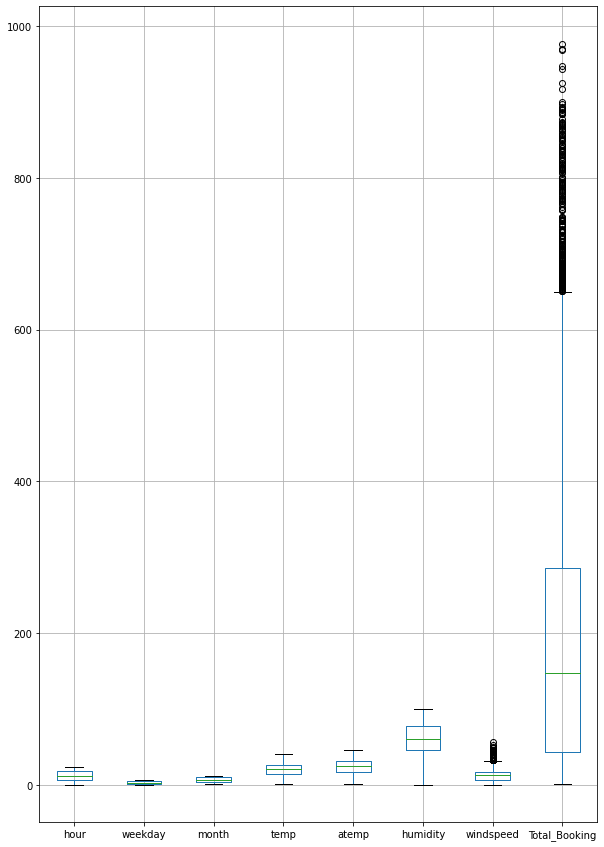

In [151]:

train_data_df.boxplot(figsize=(10,15))
plt.show()

**Outliers are found in windspeed and Total_Booking columns**

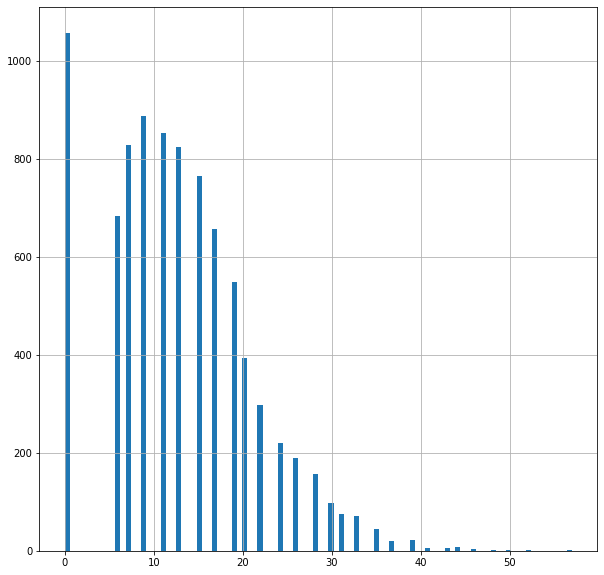

In [152]:
train_data_df['windspeed'].hist(bins=100, figsize=(10,10))
plt.show()

**Windspeed value with 0 are more.**
Shows the data is right skewed, thus having lot of outliers. Clip the values that are above 40 to 40


In [153]:
# clip the values 

q1 = train_data_df['windspeed'].quantile(.25)
q3 = train_data_df['windspeed'].quantile(.75)
IQR = q3 - q1
train_data_df['windspeed'] = np.clip(train_data_df['windspeed'], q1 - 1.5*IQR, q3+1.5*IQR)


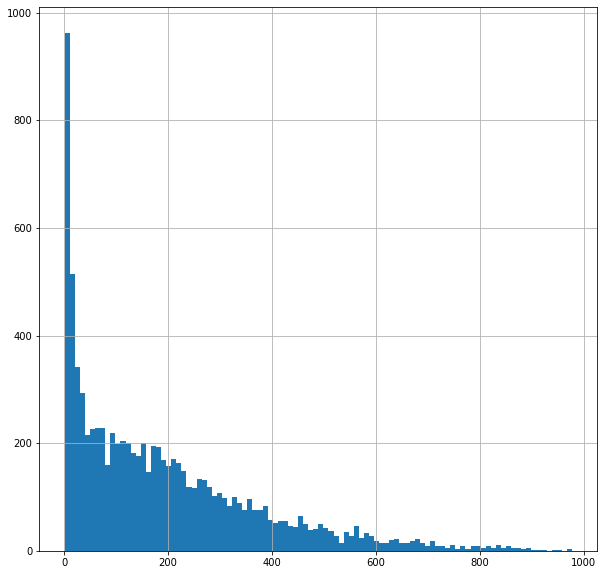

In [154]:
train_data_df['Total_Booking'].hist(bins=100, figsize=(10,10))

Lot of TotalBooking counts are zero - It could be possible that these includes where data is not recorded. Data is skewed, we can clip the data using IQR

In [155]:
q1 = train_data_df['Total_Booking'].quantile(.25)
q3 = train_data_df['Total_Booking'].quantile(.75)
IQR = q3 - q1
#clip the data between the IQR
train_data_df['Total_Booking'] = np.clip(train_data_df['Total_Booking'], q1 - 1.5*IQR, q3+1.5*IQR)


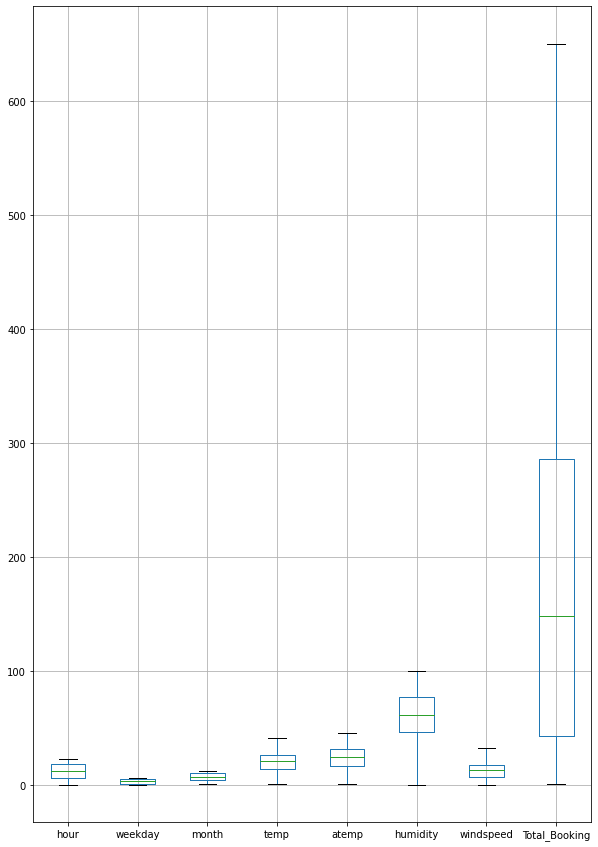

In [156]:
train_data_df.boxplot(figsize=(10,15))
plt.show()

Outliers are removed now

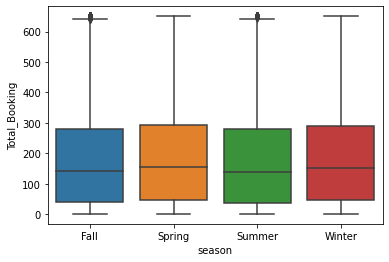

In [157]:
sns.boxplot(x='season', y= 'Total_Booking', data=train_data_df )


**No such outlier found for season**

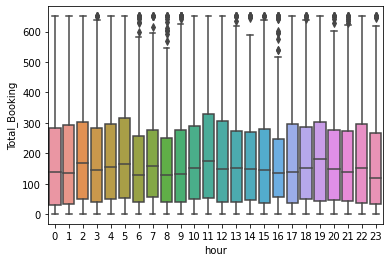

In [158]:
sns.boxplot(x='hour', y = 'Total_Booking', data = train_data_df)

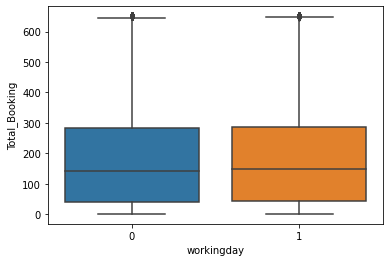

In [159]:
sns.boxplot(x='workingday', y = 'Total_Booking', data = train_data_df)

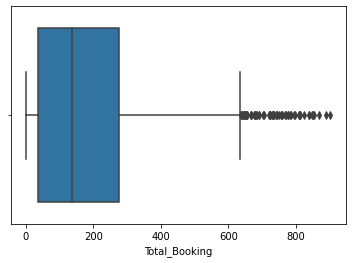

In [160]:

# Plot Box plots across season
sns.boxplot(x=test_data_df["Total_Booking"])
plt.show()

**Above boxplot shows that, total bookings is same in all seasons.**

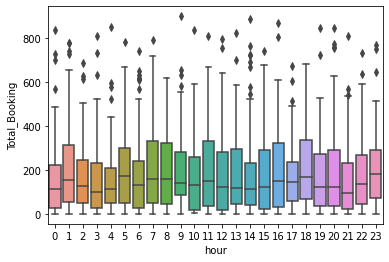

In [161]:
# Plot Box plots across hour of the day
sns.boxplot(x="hour", y="Total_Booking", data=test_data_df)
plt.show()

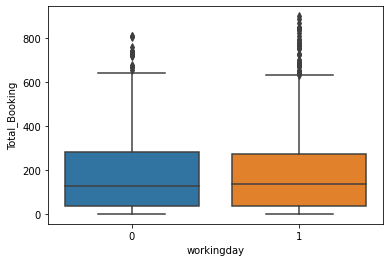

In [162]:
# Plot Box plots across hour of the day
sns.boxplot(x="workingday", y="Total_Booking", data=test_data_df)
plt.show()

#5. Perform Correlation Analysis
a. Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity","windspeed"]

b. Write down your inference in the markdown cell

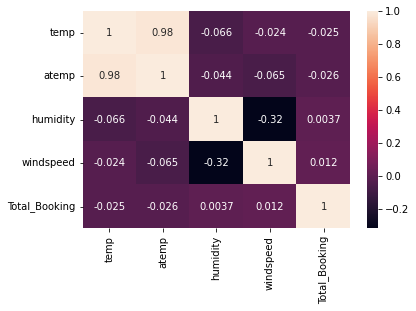

In [163]:
corr_df =  train_data_df[["temp", "atemp", "humidity","windspeed", 'Total_Booking']]
corr = corr_df.corr()
sns.heatmap(corr, annot= True)

Total Booking is dependent on all features and also shows that it is less dependent on humidity. 

Temp is negitive correlation which shows that if temp increases, Total Bookings reduces.


#6. Perform Data Visualization
a. Visualize distribution of data: total_booking column and plot the probability
distribution plot for the column as well

b. Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)

c. Use Histograms to plot all the continuous variables present in the data

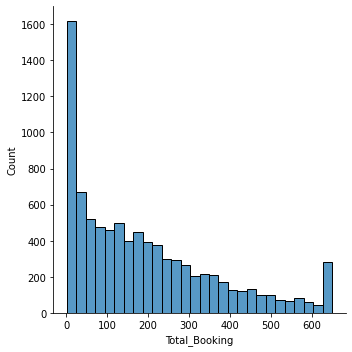

In [164]:
sns.displot(train_data_df['Total_Booking'])

Zero Total bookings happened 1600 times

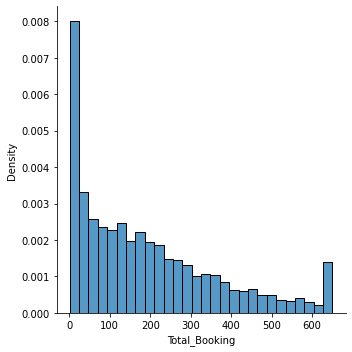

In [165]:
sns.displot(train_data_df['Total_Booking'],stat="density", common_norm=False)

Zero total bookings is having highest density

In [166]:
train_data_df.dtypes

date               object
hour                int64
weekday             int64
month               int64
season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_Booking     float64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


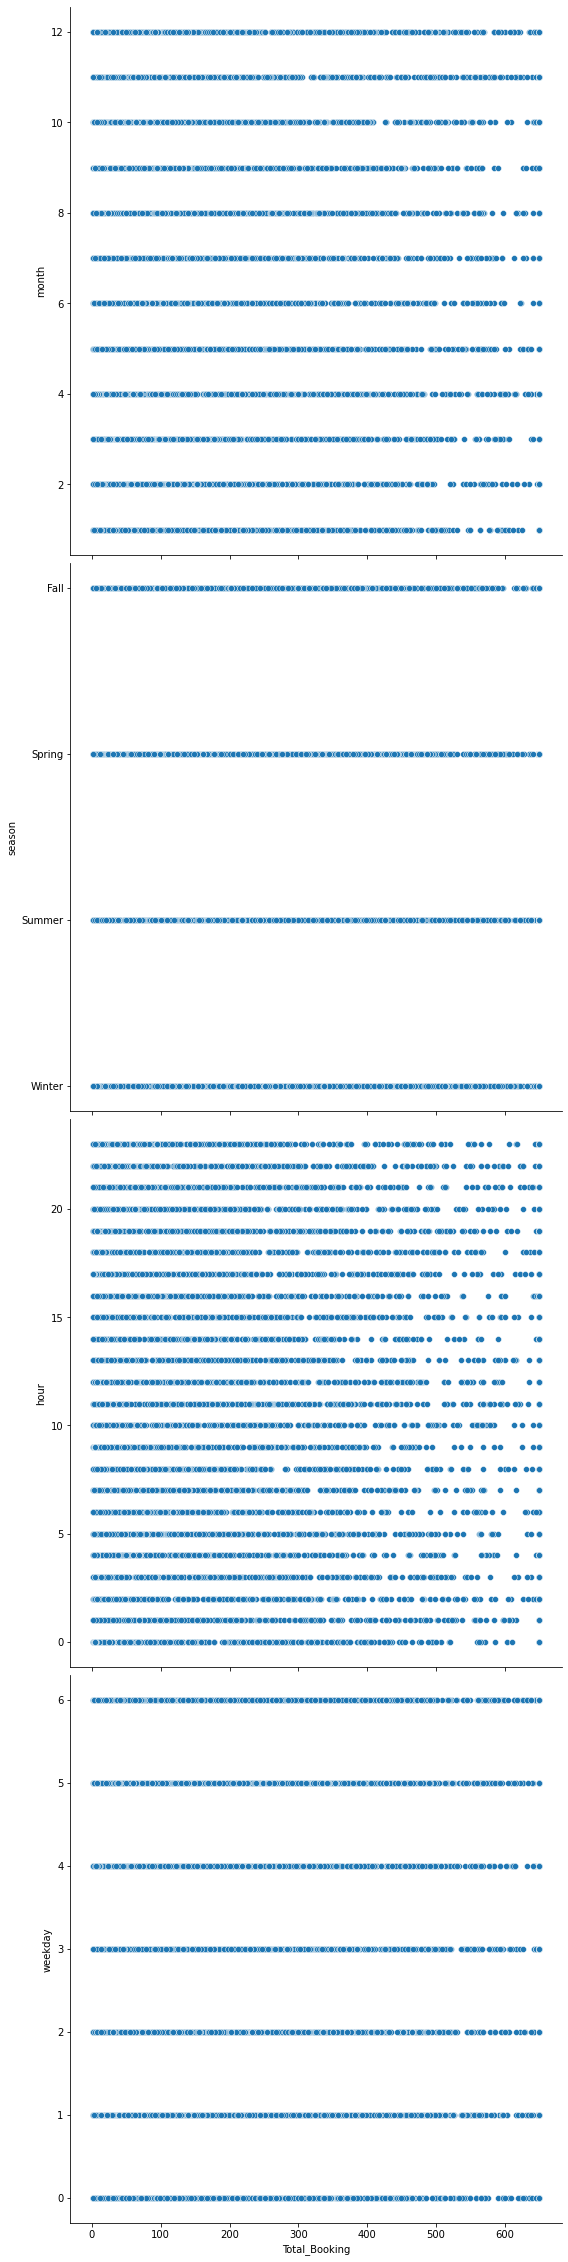

In [167]:
sns.pairplot(train_data_df, x_vars=["Total_Booking"], y_vars=["month", "season", "hour", "weekday"], size = 8)

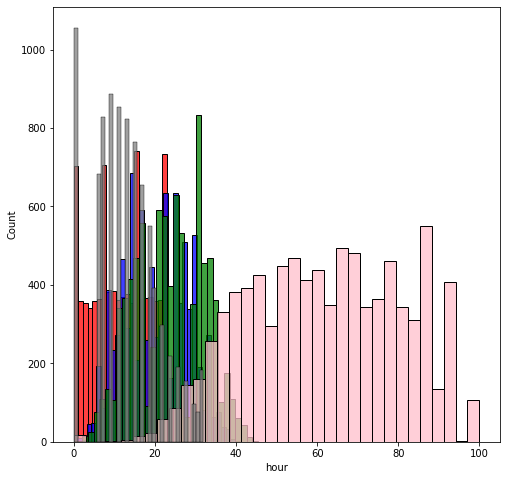

In [168]:
# continous variables are hour, temp, atemp, humidity, windspeed
plt.figure(figsize=(8,8))
sns.histplot(data=train_data_df, x='hour', color='red')
sns.histplot(data=train_data_df, x='temp' , color='blue')
sns.histplot(data=train_data_df, x='atemp', color='green')
sns.histplot(data=train_data_df, x='humidity', color='pink')
sns.histplot(data=train_data_df, x='windspeed', color='grey')
plt.show()


#7. Convert the categorical variables into one hot vector

In [169]:
train_data_df.dtypes

date               object
hour                int64
weekday             int64
month               int64
season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_Booking     float64
dtype: object

season, holiday, workingday, weather are categorical variables


In [170]:
encoded_train_data_df = train_data_df
encoded_test_data_df = test_data_df

# generate binary values using get_dummies
encoded_train_data_df = pd.get_dummies(encoded_train_data_df, columns=["season", "holiday", "workingday", "weather"], prefix=["season_","holiday_", "workingday_","weather_"] )
# merge with main df bridge_df on key values
print(encoded_train_data_df.dtypes)
encoded_test_data_df = pd.get_dummies(encoded_test_data_df, columns=["season", "holiday", "workingday", "weather"], prefix=["season_","holiday_", "workingday_","weather_"] )
print(encoded_test_data_df.dtypes)

date                                     object
hour                                      int64
weekday                                   int64
month                                     int64
temp                                    float64
atemp                                   float64
humidity                                  int64
windspeed                               float64
Total_Booking                           float64
season__Fall                              uint8
season__Spring                            uint8
season__Summer                            uint8
season__Winter                            uint8
holiday__0                                uint8
holiday__1                                uint8
workingday__0                             uint8
workingday__1                             uint8
weather__ Clear + Few clouds              uint8
weather__ Heavy Rain + Thunderstorm       uint8
weather__ Light Snow, Light Rain          uint8
weather__ Mist + Cloudy                 

In [171]:
import datetime as dt
temp_train_df  = encoded_train_data_df 
temp_train_df['date']= temp_train_df['date'].map(dt.date.toordinal)

print(temp_train_df.head())
print(temp_train_df['date'].unique())

temp_test_df  = encoded_test_data_df 
temp_test_df['date']= temp_test_df['date'].map(dt.date.toordinal)

print(temp_test_df.head())
print(temp_test_df['date'].unique())


     date  hour  ...  weather__ Light Snow, Light Rain  weather__ Mist + Cloudy 
0  734625    19  ...                                 0                         0
1  734751     4  ...                                 0                         0
2  734150     9  ...                                 0                         0
3  734459    16  ...                                 0                         0
4  734393    13  ...                                 0                         0

[5 rows x 21 columns]
[734625 734751 734150 734459 734393 734732 734782 734756 734698 734174
 734519 734209 734668 734542 734399 734186 734419 734666 734351 734392
 734275 734722 734363 734488 734840 734240 734658 734694 734812 734330
 734629 734484 734323 734443 734261 734329 734854 734294 734810 734175
 734633 734460 734847 734301 734757 734138 734143 734700 734856 734659
 734638 734670 734147 734576 734765 734334 734852 734307 734453 734450
 734537 734449 734696 734365 734511 734641 734290 734204 734547 7

In [172]:
train_data_df = temp_train_df
test_data_df = temp_test_df

#8. Split your dataset for training and testing 

In [173]:
X = train_data_df.drop(columns="Total_Booking")
Y = train_data_df["Total_Booking"]

# X = train_data_df.iloc[:,:-1]
# print(X.head())
# Y = train_data_df.iloc[:, :-1]
# print(Y.head())

# spilt the data into 20% test data and 80% train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

        date  hour  ...  weather__ Light Snow, Light Rain  weather__ Mist + Cloudy 
6646  734353    21  ...                                 0                         1
5669  734565    22  ...                                 0                         0
690   734819    18  ...                                 0                         0
5417  734185     6  ...                                 0                         0
6009  734630    17  ...                                 0                         1

[5 rows x 20 columns]
        date  hour  ...  weather__ Light Snow, Light Rain  weather__ Mist + Cloudy 
8553  734299     4  ...                                 0                         0
6672  734600     7  ...                                 0                         0
3980  734826    21  ...                                 0                         1
5270  734819    17  ...                                 0                         0
4269  734671     9  ...                              

In [174]:
# convert the date object to ordinal


#9. Fit various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor) 

In [175]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(max_depth=2, random_state=5)
rf_regr.fit(X_train, y_train)

rf_y_pred = rf_regr.predict(X_test)





In [176]:
from sklearn.ensemble import AdaBoostRegressor
aboost_regr = AdaBoostRegressor(random_state=0, n_estimators=100)
aboost_regr.fit(X_train, y_train)

aboost_y_pred = aboost_regr.predict(X_test)

In [177]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
bg_regr = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0)
bg_regr.fit(X_train, y_train)
bg_y_pred = bg_regr.predict(X_test)

In [178]:
from sklearn.svm import SVR
regr = SVR(C=1.0, epsilon=0.2)
regr.fit(X_train, y_train)

svr_y_pred = regr.predict(X_test)

In [179]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh_y_pred = neigh.predict(X_test)

#10. Display a Factor plot to visualize the RMSE values achieved by different modeling algorithm 

RMSE value of Random forest -  171.39701679109552
RMSE value of Ada Boost -  177.85141085515832
RMSE value of Bagging regressor -  173.93243429284067
RMSE value of SVR -  173.98475399298403
RMSE value of K-neighbours -  187.4162613621404


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


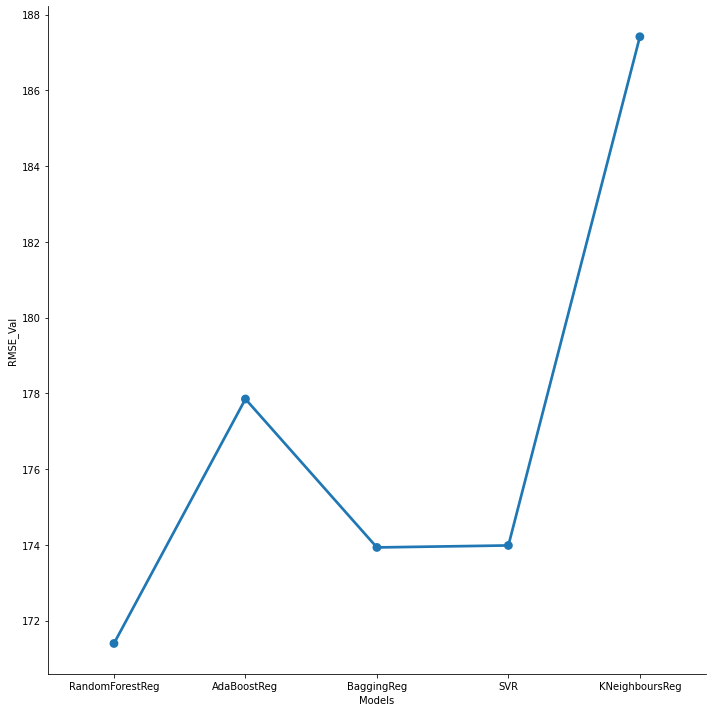

In [180]:
from sklearn import metrics

#print the RMSE values of different models
rmse_randomforest = np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred))
print("RMSE value of Random forest - ", rmse_randomforest)

rmse_aboost = np.sqrt(metrics.mean_squared_error(y_test, aboost_y_pred))
print("RMSE value of Ada Boost - ",rmse_aboost)

rmse_bg = np.sqrt(metrics.mean_squared_error(y_test, bg_y_pred))
print("RMSE value of Bagging regressor - ",rmse_bg)

rmse_svr = np.sqrt(metrics.mean_squared_error(y_test, svr_y_pred))
print("RMSE value of SVR - ",rmse_svr)
rmse_neigh = np.sqrt(metrics.mean_squared_error(y_test, neigh_y_pred))
print("RMSE value of K-neighbours - ",rmse_neigh)

rmse_df = pd.DataFrame({"Models":["RandomForestReg","AdaBoostReg", "BaggingReg", "SVR", "KNeighboursReg"], 
                        "RMSE_Val":[rmse_randomforest, rmse_aboost, rmse_bg, rmse_svr, rmse_neigh]})
rmse_df
sns.factorplot(x ='Models', y ='RMSE_Val', data = rmse_df, size=10)
plt.show()

Above graph shows the Random Forest Regression model predicts the values that are near to actual. 

K-Neighbours regression model predicts values that are more deviated from actuals

So the bestmodel is ***Random Forest Regression***


# 11. Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_ 

In [181]:
# based on previous RMSE validation, RandomForestRegressor is the best model
reg = RandomForestRegressor(random_state=0)
from pprint import pprint
# parameters of model that need tuning
pprint(reg.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [182]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [183]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [197]:
# First create the base model to tune
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 2, verbose=2, random_state=2, n_jobs = -1)

rf_random.fit(X_train, y_train)



Fitting 2 folds for each of 3 candidates, totalling 6 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=2, verbose=2)

In [198]:
print("The best parameters for Random forest regressor model are ---")
pprint(rf_random.best_params_)


The best parameters for Random forest regressor model are ---
{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1000}


#12. Perform prediction on the test set and print the mean_squared_log_error

In [199]:
print(test_data_df.dtypes)
print(train_data_df.dtypes)

date                                  int64
hour                                  int64
weekday                               int64
month                                 int64
temp                                float64
atemp                               float64
humidity                              int64
windspeed                           float64
Total_Booking                       float64
season__Fall                          uint8
season__Spring                        uint8
season__Summer                        uint8
season__Winter                        uint8
holiday__0                            uint8
holiday__1                            uint8
workingday__0                         uint8
workingday__1                         uint8
weather__ Clear + Few clouds          uint8
weather__ Light Snow, Light Rain      uint8
weather__ Mist + Cloudy               uint8
dtype: object
date                                      int64
hour                                      int64
weekday   

In [200]:
# predict on test data
X = test_data_df.drop(columns=["Total_Booking"])
y = test_data_df["Total_Booking"]
# added the extra column as it is missing field in test data
X['weather__ Heavy Rain + Thunderstorm'] = X.apply (lambda row: 0, axis=1)

X.head()

,date,hour,weekday,month,temp,atemp,humidity,windspeed,season__Fall,season__Spring,season__Summer,season__Winter,holiday__0,holiday__1,workingday__0,workingday__1,weather__ Clear + Few clouds,"weather__ Light Snow, Light Rain",weather__ Mist + Cloudy,weather__ Heavy Rain + Thunderstorm
0,734633,11,3,5,21.32,25.000,48,35.0008,0,0,1,0,1,0,0,1,1,0,0,0
1,734663,7,5,6,23.78,27.275,64,7.0015,0,0,1,0,1,0,1,0,1,0,0,0
2,734202,20,6,3,11.48,12.120,100,27.9993,0,1,0,0,1,0,1,0,0,1,0,0
3,734423,11,3,10,25.42,28.790,83,0.0000,0,0,0,1,1,0,0,1,0,0,1,0
4,734656,12,5,6,25.42,31.060,43,23.9994,0,0,1,0,1,0,1,0,1,0,0,0


In [201]:
best_random = rf_random.best_estimator_

y_pred = best_random.predict(X)

rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
print(rmse)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- weather__ Heavy Rain + Thunderstorm
Feature names seen at fit time, yet now missing:
- weather__ Heavy Rain + Thunderstorm 

  warnings.warn(message, FutureWarning)


182.59879640896136


RMSE value of the best model is 135 which is much less than the RMSE value (172) of the base model